#**Analisis de sentimiento de los tweets relacionados con cada cluster**



## Importamos librerías

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import tokenize
import numpy as np

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import os

import pandas as pd
import re
import matplotlib.pyplot as plt

import os
from glob import glob
import unicodedata # Preprocesado
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Conecto con drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_tweets='drive/My Drive/keepcoding/Tweets/tweets/'
path_words='drive/My Drive/keepcoding/Tweets/resultados/wordclouds/'


# Importo tweets 

In [ ]:
files_cluster0 = [filename for filename in os.listdir(path_tweets+'/clusters') if filename.startswith("Cluster0")]
files_cluster1 = [filename for filename in os.listdir(path_tweets+'/clusters') if filename.startswith("Cluster1")]
files_cluster2 = [filename for filename in os.listdir(path_tweets+'/clusters') if filename.startswith("Cluster2")]
files_cluster3 = [filename for filename in os.listdir(path_tweets+'/clusters') if filename.startswith("Cluster3")]
files_cluster4 = [filename for filename in os.listdir(path_tweets+'/clusters') if filename.startswith("Cluster4")]

In [ ]:
df_cluster0 = pd.concat((pd.read_csv(path_tweets+'/clusters/'+f) for f in files_cluster0), ignore_index=True).drop_duplicates()
df_cluster1 = pd.concat((pd.read_csv(path_tweets+'/clusters/'+f) for f in files_cluster1), ignore_index=True).drop_duplicates()
df_cluster2 = pd.concat((pd.read_csv(path_tweets+'/clusters/'+f) for f in files_cluster2), ignore_index=True).drop_duplicates()
df_cluster3 = pd.concat((pd.read_csv(path_tweets+'/clusters/'+f) for f in files_cluster3), ignore_index=True).drop_duplicates()
df_cluster4 = pd.concat((pd.read_csv(path_tweets+'/clusters/'+f) for f in files_cluster4), ignore_index=True).drop_duplicates()
list_df_clusters=['df_cluster0','df_cluster1','df_cluster2','df_cluster3','df_cluster4']

In [ ]:
print(f'Tengo {len(df_cluster0)} en el Cluster 0')
print(f'Tengo {len(df_cluster1)} en el Cluster 1')
print(f'Tengo {len(df_cluster2)} en el Cluster 2')
print(f'Tengo {len(df_cluster3)} en el Cluster 3')
print(f'Tengo {len(df_cluster4)} en el Cluster 4')

Tengo 50 en el Cluster 0
Tengo 92 en el Cluster 1
Tengo 230 en el Cluster 2
Tengo 107 en el Cluster 3
Tengo 178 en el Cluster 4


## Limpiamos tweets

In [ ]:
stop_words_custom={'school','lessons','classroom','education', 'student', 'students','teacher','taught','teachers','learn','learned','teaching'}
stop_words.update(stop_words_custom)

In [ ]:
def sentence_normalization(sentence):
    sentence = unicodedata.normalize('NFKD', sentence).lower().encode('ascii', errors='ignore').decode('utf-8')
    sentence = re.sub(' +', ' ', ' '.join([word if word.isalpha() else '' for word in sentence.split()])).strip()
    return sentence

In [ ]:
def remove_stopwords(sentence, stop_words):
    sentence = ' '.join([word for word in sentence.split() if word not in stop_words])
    return sentence

In [ ]:
def process_tweets(reviews, stop_words):
    processed_sentences = []
    for sent in reviews:
        if not sent != sent:  # check if sent is not nan
            sent = sentence_normalization(sent)
            sent = remove_stopwords(sent, stop_words)
            processed_sentences.append(sent)
        else:
            processed_sentences.append('None')
    return processed_sentences

In [ ]:
processed_tweets = process_tweets(df_cluster0['tweet_text'], stop_words)
df_cluster0['tweet_text_processed']=processed_tweets

In [ ]:
print('Tweet original: {}'.format(df_cluster0['tweet_text'][6]))
print('Tweet procesado: {}'.format(df_cluster0['tweet_text_processed'][6]))

Tweet original: Australia said it will ban TikTok on all government-issued digital devices. The decision means all members of the F… https://t.co/9dvjgRfOCa
Tweet procesado: australia said ban tiktok digital decision means members


In [ ]:
processed_tweets = process_tweets(df_cluster1['tweet_text'], stop_words)
df_cluster1['tweet_text_processed']=processed_tweets

In [ ]:
print('Tweet original: {}'.format(df_cluster1['tweet_text'][6]))
print('Tweet procesado: {}'.format(df_cluster1['tweet_text_processed'][6]))

Tweet original: Nigeria’s next president should integrate French language as a compulsory part of our school curriculums. Raising a… https://t.co/ITEKeH8z0J
Tweet procesado: nigerias next president integrate french language compulsory part raising


In [ ]:
processed_tweets = process_tweets(df_cluster2['tweet_text'], stop_words)
df_cluster2['tweet_text_processed']=processed_tweets

In [ ]:
print('Tweet original: {}'.format(df_cluster2['tweet_text'][6]))
print('Tweet procesado: {}'.format(df_cluster2['tweet_text_processed'][6]))

Tweet original: In 1994, Quinnipiac hired Rand Pecknold for $6,700 a year.

He taught at a high school to earn extra money, and his… https://t.co/WdChc2OuvB
Tweet procesado: quinnipiac hired rand pecknold high earn extra


In [ ]:
processed_tweets = process_tweets(df_cluster3['tweet_text'], stop_words)
df_cluster3['tweet_text_processed']=processed_tweets

In [ ]:
print('Tweet original: {}'.format(df_cluster3['tweet_text'][6]))
print('Tweet procesado: {}'.format(df_cluster3['tweet_text_processed'][6]))

Tweet original: Elon Musk has changed NPR’s tag to “government funded.” Any day now he should be adding this language to SapceX and… https://t.co/sccA14g77u
Tweet procesado: elon musk changed nprs tag government day adding language sapcex


In [ ]:
processed_tweets = process_tweets(df_cluster4['tweet_text'], stop_words)
df_cluster4['tweet_text_processed']=processed_tweets

In [ ]:
print('Tweet original: {}'.format(df_cluster4['tweet_text'][6]))
print('Tweet procesado: {}'.format(df_cluster4['tweet_text_processed'][6]))

Tweet original: .@AaronHillegass, the director of New College's data science program, called Ron DeSantis a fascist in his resignat… https://t.co/mhP9Oq0FVF
Tweet procesado: director new data science called ron desantis fascist


# Word cloud cluster 0

In [ ]:
splitted_tweets = df_cluster0['tweet_text_processed'].str.lower().str.split()

In [ ]:
words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)

In [ ]:
words.to_csv(path_words+'words_df_cluster0.csv',index=False)

In [ ]:
print(len(words))

480


In [ ]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

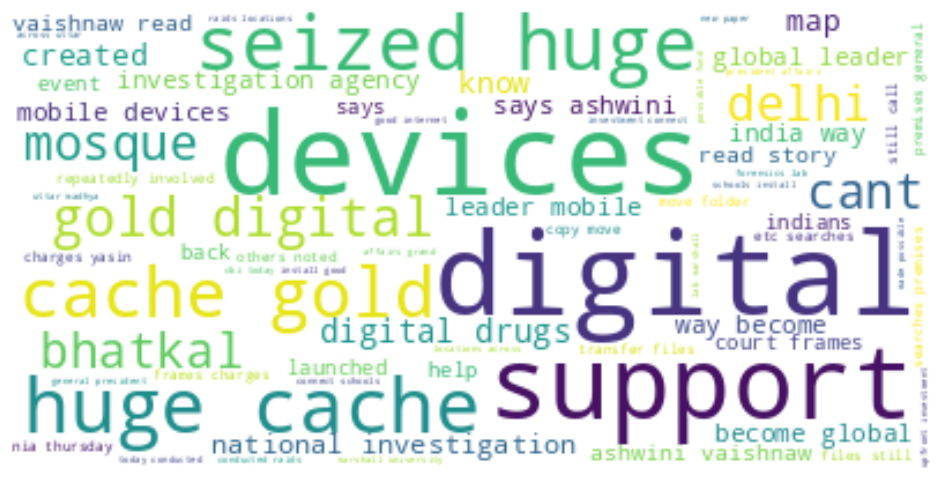

In [ ]:
plot_word_cloud(words)

# Word cloud cluster 1

In [ ]:
splitted_tweets = df_cluster1['tweet_text_processed'].str.lower().str.split()

In [ ]:
words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)

In [ ]:
# guardo para utilizar después en la presentación de resultados
words.to_csv(path_words+'words_df_cluster1.csv',index=False)

In [ ]:
print(len(words))

765


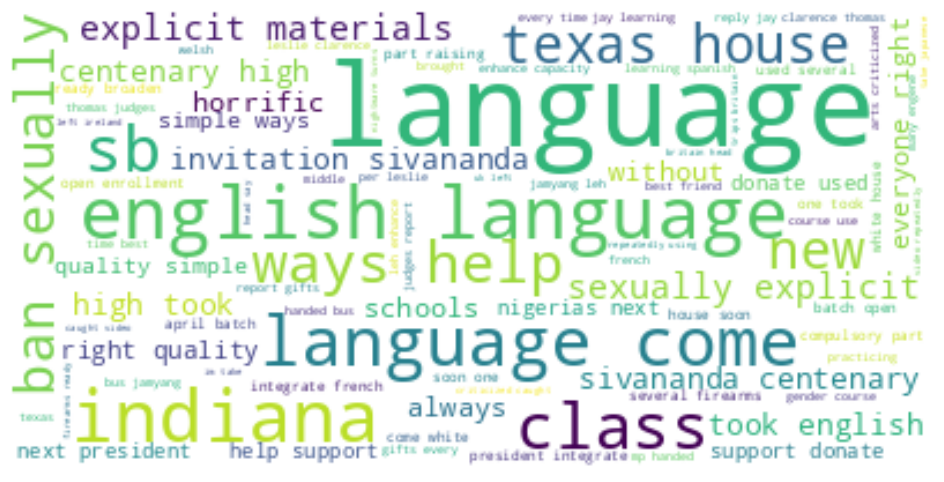

In [ ]:
plot_word_cloud(words)


# Word cloud df_cluster2

In [ ]:
splitted_tweets = df_cluster2['tweet_text_processed'].str.lower().str.split()

In [ ]:
words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)

In [ ]:
# guardo para utilizar después en la presentación de resultados
words.to_csv(path_words+'words_df_cluster2.csv',index=False)

In [ ]:
print(len(words))

765


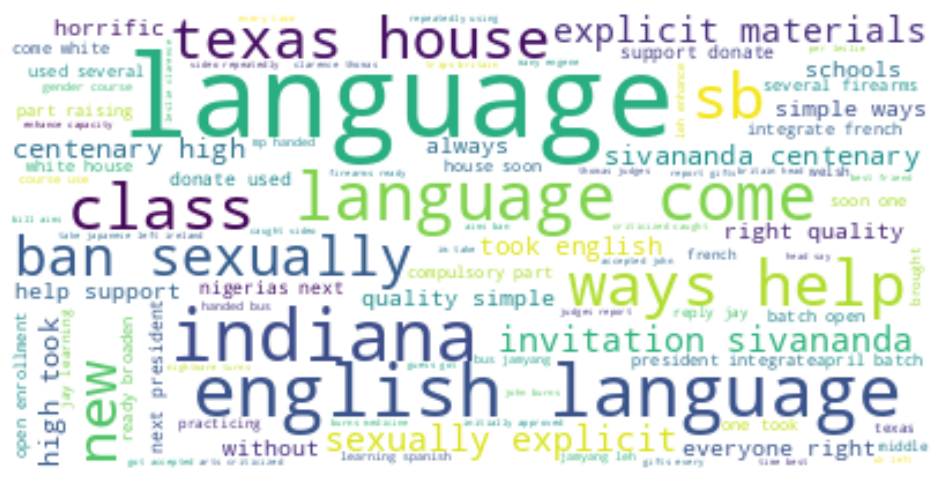

In [ ]:
plot_word_cloud(words)


# Word cloud df_cluster3

In [ ]:
splitted_tweets = df_cluster3['tweet_text_processed'].str.lower().str.split()

In [ ]:
words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)

In [ ]:
# guardo para utilizar después en la presentación de resultados
words.to_csv(path_words+'words_df_cluster3.csv',index=False)

In [ ]:
print(len(words))

877


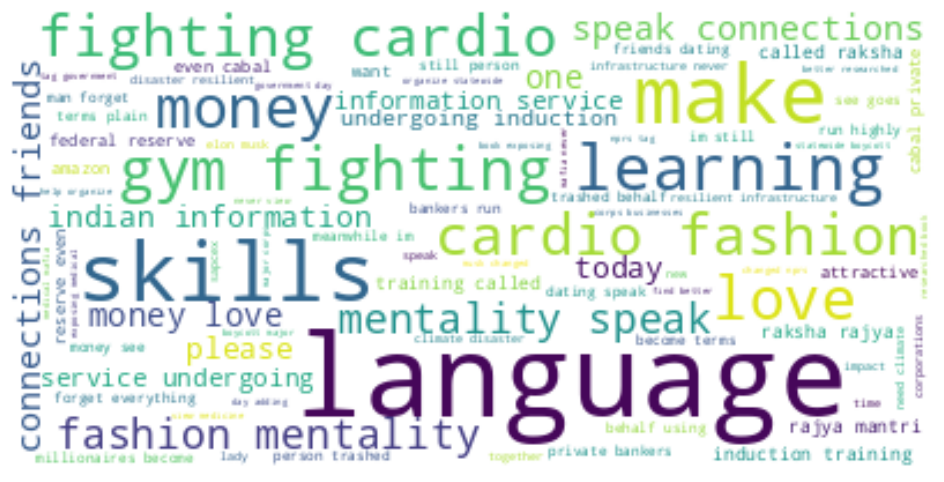

In [ ]:
plot_word_cloud(words)


# Word cloud df_cluster4

In [ ]:
splitted_tweets = df_cluster4['tweet_text_processed'].str.lower().str.split()

In [ ]:
words = splitted_tweets.apply(pd.Series).stack().reset_index(drop = True)

In [ ]:
# guardo para utilizar después en la presentación de resultados
words.to_csv(path_words+'words_df_cluster4.csv',index=False)

In [ ]:
print(len(words))

1377


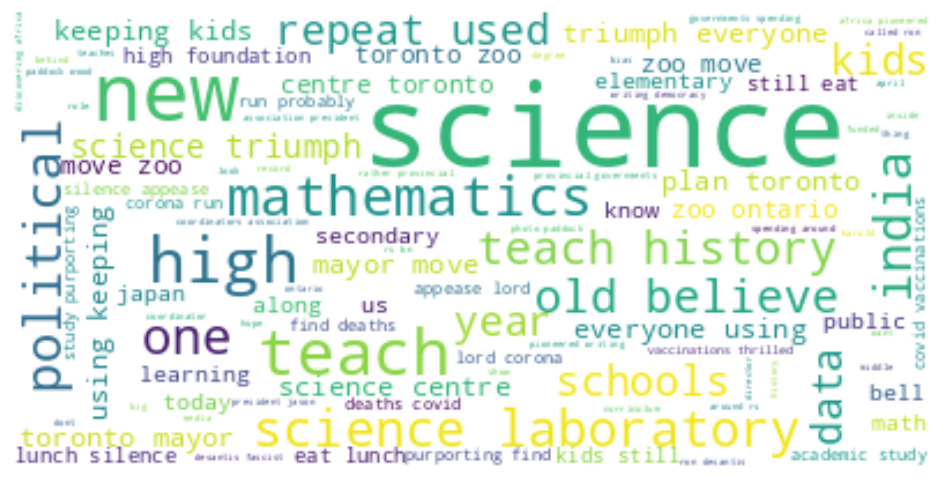

In [ ]:
plot_word_cloud(words)